In [49]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import PIL
import tensorflow as tf
import pickle
from tensorflow import keras
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
data_dir = 'C:\\Users\\Sai Charan\\Downloads\\archive\\Dataset\\Brain Tumor CT scan Images'

In [3]:
data_dir

'C:\\Users\\Sai Charan\\Downloads\\archive\\Dataset\\Brain Tumor CT scan Images'

In [4]:
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/Sai Charan/Downloads/archive/Dataset/Brain Tumor CT scan Images')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3873

In [6]:
img = list(data_dir.glob('*/*.jpg'))

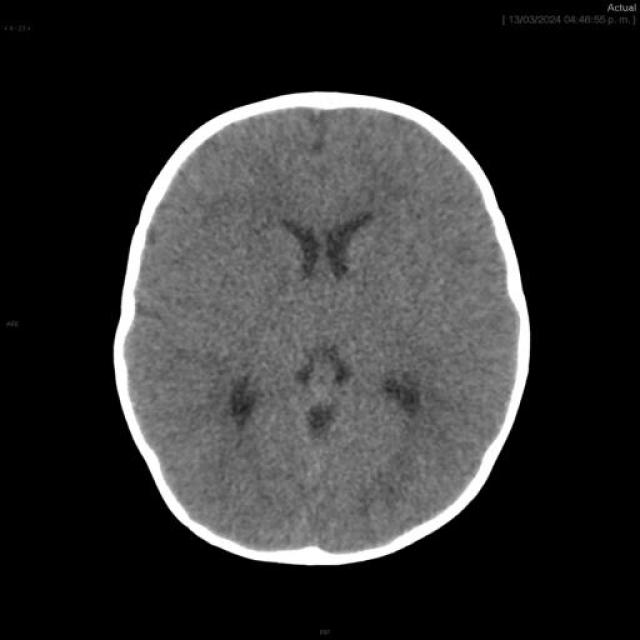

In [7]:
PIL.Image.open(str(img[5]))

In [8]:
def pathlib_convertion(directory):
    dataset_dir = pathlib.Path(directory)
    return dataset_dir


In [9]:
dataset_dir = 'C:\\Users\\Sai Charan\\Downloads\\archive\\Dataset'
dataset = pathlib_convertion(dataset_dir)
dataset

WindowsPath('C:/Users/Sai Charan/Downloads/archive/Dataset')

In [10]:
brain_tumor_dataset = {
    'ct_healthy': list(dataset.glob('Brain Tumor CT scan Images/Healthy/*')),
    'ct_unhealthy': list(dataset.glob('Brain Tumor CT scan Images/Tumor/*')),
    'mri_healthy': list(dataset.glob('Brain Tumor MRI Images/Healthy/*')),
    'mri_unhealthy': list(dataset.glob('Brain Tumor MRI Images/Tumor/*')),
}

brain_tumor_label = {
    'ct_healthy': 0,
    'ct_unhealthy': 1,
    'mri_healthy': 2,
    'mri_unhealthy': 3
}

In [11]:
list(brain_tumor_dataset['mri_healthy'])

[WindowsPath('C:/Users/Sai Charan/Downloads/archive/Dataset/Brain Tumor MRI Images/Healthy/mri_healthy (1).jpeg'),
 WindowsPath('C:/Users/Sai Charan/Downloads/archive/Dataset/Brain Tumor MRI Images/Healthy/mri_healthy (1).jpg'),
 WindowsPath('C:/Users/Sai Charan/Downloads/archive/Dataset/Brain Tumor MRI Images/Healthy/mri_healthy (10).jpg'),
 WindowsPath('C:/Users/Sai Charan/Downloads/archive/Dataset/Brain Tumor MRI Images/Healthy/mri_healthy (100).jpg'),
 WindowsPath('C:/Users/Sai Charan/Downloads/archive/Dataset/Brain Tumor MRI Images/Healthy/mri_healthy (1000).jpg'),
 WindowsPath('C:/Users/Sai Charan/Downloads/archive/Dataset/Brain Tumor MRI Images/Healthy/mri_healthy (1001).jpg'),
 WindowsPath('C:/Users/Sai Charan/Downloads/archive/Dataset/Brain Tumor MRI Images/Healthy/mri_healthy (1002).jpg'),
 WindowsPath('C:/Users/Sai Charan/Downloads/archive/Dataset/Brain Tumor MRI Images/Healthy/mri_healthy (1003).jpg'),
 WindowsPath('C:/Users/Sai Charan/Downloads/archive/Dataset/Brain Tumor 

In [12]:
img = cv2.imread(str(brain_tumor_dataset['ct_unhealthy'][0]))
img.shape

(255, 205, 3)

In [13]:
cv2.resize(img,(64,64)).shape

(64, 64, 3)

In [14]:
if img is None:
    print("Image failed to load. Please check the file path or format.")
else:
    print("Image loaded successfully with shape:", img.shape)

Image loaded successfully with shape: (255, 205, 3)


In [15]:
x = []
y = []
for scan_output, brain_images in brain_tumor_dataset.items():
    for images in brain_images:
        img = cv2.imread(str(images))
        resized_img = cv2.resize(img,(64,64))
        x.append(resized_img)
        y.append(brain_tumor_label[scan_output])

In [16]:
X = np.array(x)
Y = np.array(y)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,stratify=Y, random_state=42)

In [18]:
len(x_train), len(x_test)

(7213, 2405)

In [19]:
x_train

array([[[[ 63,  63,  63],
         [  5,   5,   5],
         [  8,   8,   8],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[ 10,  10,  10],
         [  7,   7,   7],
         [  5,   5,   5],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[ 15,  15,  15],
         [  1,   1,   1],
         [  2,   2,   2],
         ...,
         [  8,   8,   8],
         [  4,   4,   4],
         [  2,   2,   2]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [20]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomZoom(0.2),
])


In [41]:
# Convert and normalize training data
x_train = x_train.astype('float32') / 255.0
y_train = np.array(y_train, dtype=np.int32)  # Ensure labels are integers

# Define the model
model = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(64, 3, padding='same', activation='relu', input_shape=(64, 64, 3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.3),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(4, activation='sigmoid')  # No activation if using from_logits=True in loss
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(x_train, y_train, epochs=15)


Epoch 1/15
226/226 [==============================] - 41s 169ms/step - loss: 1.0334 - accuracy: 0.4916
Epoch 2/15
226/226 [==============================] - 38s 166ms/step - loss: 0.7286 - accuracy: 0.6021
Epoch 3/15
226/226 [==============================] - 38s 166ms/step - loss: 0.6795 - accuracy: 0.6395
Epoch 4/15
226/226 [==============================] - 38s 166ms/step - loss: 0.6344 - accuracy: 0.6815
Epoch 5/15
226/226 [==============================] - 38s 167ms/step - loss: 0.5864 - accuracy: 0.7190
Epoch 6/15
226/226 [==============================] - 38s 167ms/step - loss: 0.5501 - accuracy: 0.7495
Epoch 7/15
226/226 [==============================] - 38s 168ms/step - loss: 0.5158 - accuracy: 0.7780
Epoch 8/15
226/226 [==============================] - 38s 170ms/step - loss: 0.4914 - accuracy: 0.7950
Epoch 9/15
226/226 [==============================] - 38s 169ms/step - loss: 0.4735 - accuracy: 0.8067
Epoch 10/15
226/226 [==============================] - 38s 167ms/step - l

In [42]:
# Define the model
model = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(64, 3, padding='same', activation='relu', input_shape=(64, 64, 3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.3),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(4, activation='sigmoid')  # No activation if using from_logits=True in loss
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
226/226 [==============================] - 41s 172ms/step - loss: 1.0452 - accuracy: 0.4937
Epoch 2/50
226/226 [==============================] - 38s 166ms/step - loss: 0.7305 - accuracy: 0.6197
Epoch 3/50
226/226 [==============================] - 39s 171ms/step - loss: 0.6724 - accuracy: 0.6669
Epoch 4/50
226/226 [==============================] - 38s 167ms/step - loss: 0.6375 - accuracy: 0.6849
Epoch 5/50
226/226 [==============================] - 38s 166ms/step - loss: 0.5793 - accuracy: 0.7344
Epoch 6/50
226/226 [==============================] - 38s 167ms/step - loss: 0.5252 - accuracy: 0.7688
Epoch 7/50
226/226 [==============================] - 38s 169ms/step - loss: 0.5040 - accuracy: 0.7773
Epoch 8/50
226/226 [==============================] - 38s 167ms/step - loss: 0.4680 - accuracy: 0.8052
Epoch 9/50
226/226 [==============================] - 38s 167ms/step - loss: 0.4532 - accuracy: 0.8120
Epoch 10/50
226/226 [==============================] - 38s 167ms/step - l

In [37]:
x_test = x_test.astype('float32') / 255
y_test = np.array(y_test, dtype=np.int32)  # Ensure labels are integers


In [43]:
model.evaluate(x_test, y_test)

76/76 [==============================] - 3s 33ms/step - loss: 0.3372 - accuracy: 0.8599


[0.33719688653945923, 0.8598752617835999]

In [44]:
y_pred = model.predict(x_test)
y_pred_new = np.argmax(y_pred, axis=1)
classification = classification_report(y_test, y_pred_new)
print(classification)

76/76 [==============================] - 3s 32ms/step
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       575
           1       0.99      0.83      0.91       580
           2       0.68      0.99      0.80       500
           3       0.98      0.70      0.82       750

    accuracy                           0.86      2405
   macro avg       0.88      0.88      0.86      2405
weighted avg       0.89      0.86      0.86      2405



In [45]:
y_pred_new

array([3, 2, 0, ..., 3, 3, 3], dtype=int64)

In [46]:
y_test[:10]

array([3, 2, 0, 0, 2, 3, 1, 3, 1, 0])

In [47]:
y_pred_new[:10]

array([3, 2, 0, 0, 2, 3, 1, 3, 1, 0], dtype=int64)

In [28]:
dataset = "C:\\Users\\Sai Charan\\Downloads\\sample_test_3.jpg"
dataset_dir = pathlib_convertion(dataset)

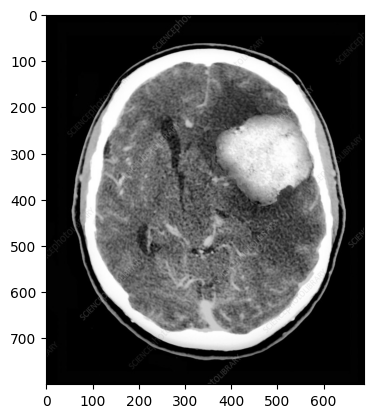

In [29]:
dataset_dir
img = cv2.imread(str(dataset_dir))
resized_img = cv2.resize(img,(64,64))
plt.imshow(img)

In [30]:
resized_img = resized_img.astype('float32')/255.0

In [31]:
resized_img = np.expand_dims(resized_img, axis=0)
resized_img.shape

(1, 64, 64, 3)

In [32]:
pred = model.predict(resized_img)
pred
predicted_class = np.argmax(pred, axis=1)
print(f"Predicted class: {predicted_class}")


1/1 [==============================] - 0s 58ms/step
Predicted class: [1]


In [50]:
exported_model = {
    'Data Augmentation': data_augmentation
}

In [51]:
with open('Brain_Tumor_Detection_CNN_Data_Augmentation.pkl', 'wb') as f:
    pickle.dump(exported_model, f)
    
model.save('brain_tumor_detection_cnn.h5')